In [96]:
import warnings
warnings.filterwarnings('ignore')

Header parameter names converted to lower case.
Header parameter names converted to lower case.
Header parameter names converted to lower case.


ImageView object:
  Display bands       :  (64, 55, 19)
  Interpolation       :  <default>
  RGB data limits     :
    R: [217.0, 292.0]
    G: [215.0, 282.0]
    B: [210.0, 242.0]

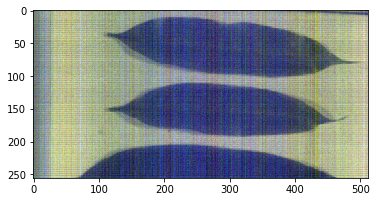

In [97]:
from spectral import imshow, view_cube
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import spectral.io.envi as envi
dark_ref = envi.open('../datasets/mangga/DARK_MANGGA/capture/DARK_MANGGA.hdr', '../datasets/mangga/DARK_MANGGA/capture/DARK_MANGGA.raw')
white_ref = envi.open('../datasets/mangga/WHITE_MANGGA/capture/WHITE_MANGGA.hdr', '../datasets/mangga/WHITE_MANGGA/capture/WHITE_MANGGA.raw')
data_ref = envi.open('../datasets/mangga/DATA1/capture/DATA1.hdr', '../datasets/mangga/DATA1/capture/DATA1.raw')

#imshow(data_ref, (110, 5, 18))
white_nparr = np.array(white_ref.load())
dark_nparr = np.array(dark_ref.load())
data_nparr = np.array(data_ref.load())

imshow(data_nparr, (64, 55, 19))

ImageView object:
  Display bands       :  (100, 100, 100)
  Interpolation       :  <default>
  RGB data limits     :
    R: [-0.1034482792019844, 1.481927752494812]
    G: [-0.1034482792019844, 1.481927752494812]
    B: [-0.1034482792019844, 1.481927752494812]

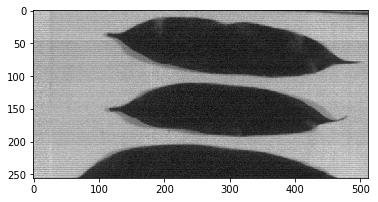

In [98]:
corrected_nparr = np.divide(
    np.subtract(data_nparr, dark_nparr), 
    np.subtract(white_nparr, dark_nparr))

imshow(corrected_nparr, (100, 100, 100))

In [122]:
from numpy import genfromtxt

bands = genfromtxt('./helpers/bands.csv', delimiter=',')

In [119]:
leaf_pixel = corrected_nparr[50:51, 300:301, :]
teflon_pixel = corrected_nparr[100:101, 50:51, :]
leaf_pixel_squeezed = np.squeeze(leaf_pixel)
teflon_pixel_squeezed = np.squeeze(teflon_pixel)

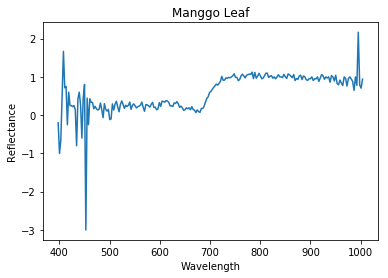

In [124]:
plt.plot(bands, leaf_pixel_squeezed)
plt.title('Manggo Leaf')
plt.xlabel('Wavelength')
plt.ylabel('Reflectance')
plt.show()

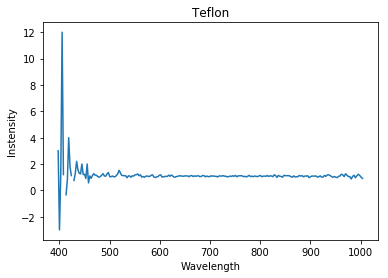

In [126]:
plt.plot(bands, teflon_pixel_squeezed)
plt.title('Teflon')
plt.xlabel('Wavelength')
plt.ylabel('Instensity')
plt.show()

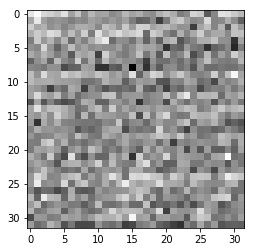

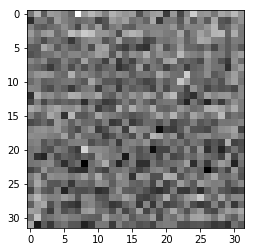

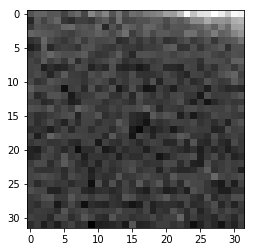

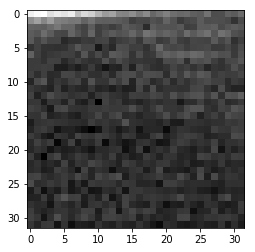

In [103]:
x = 200
y = 20
r = 32
w = r
h = r

for i in range(4):
    roi = corrected_nparr[y:y+h, x:x+w, :]
    # Geser ke kanan
    x = x + r
    imshow(roi, (100, 100, 100))